# Image Classification
In this project, you'll classify images from the [CIFAR-10 dataset](https://www.cs.toronto.edu/~kriz/cifar.html).  The dataset consists of airplanes, dogs, cats, and other objects. You'll preprocess the images, then train a convolutional neural network on all the samples. The images need to be normalized and the labels need to be one-hot encoded.  You'll get to apply what you learned and build a convolutional, max pooling, dropout, and fully connected layers.  At the end, you'll get to see your neural network's predictions on the sample images.
## Get the Data
Run the following cell to download the [CIFAR-10 dataset for python](https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz).

In [2]:
"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
from urllib.request import urlretrieve
from os.path import isfile, isdir
from tqdm import tqdm
import problem_unittests as tests
import tarfile

cifar10_dataset_folder_path = 'cifar-10-batches-py'

# Use Floyd's cifar-10 dataset if present
floyd_cifar10_location = '/input/cifar-10/python.tar.gz'
if isfile(floyd_cifar10_location):
    tar_gz_path = floyd_cifar10_location
else:
    tar_gz_path = 'cifar-10-python.tar.gz'

class DLProgress(tqdm):
    last_block = 0

    def hook(self, block_num=1, block_size=1, total_size=None):
        self.total = total_size
        self.update((block_num - self.last_block) * block_size)
        self.last_block = block_num

if not isfile(tar_gz_path):
    with DLProgress(unit='B', unit_scale=True, miniters=1, desc='CIFAR-10 Dataset') as pbar:
        urlretrieve(
            'https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz',
            tar_gz_path,
            pbar.hook)

if not isdir(cifar10_dataset_folder_path):
    with tarfile.open(tar_gz_path) as tar:
        tar.extractall()
        tar.close()


tests.test_folder_path(cifar10_dataset_folder_path)

All files found!


## Explore the Data
The dataset is broken into batches to prevent your machine from running out of memory.  The CIFAR-10 dataset consists of 5 batches, named `data_batch_1`, `data_batch_2`, etc.. Each batch contains the labels and images that are one of the following:
* airplane
* automobile
* bird
* cat
* deer
* dog
* frog
* horse
* ship
* truck

Understanding a dataset is part of making predictions on the data.  Play around with the code cell below by changing the `batch_id` and `sample_id`. The `batch_id` is the id for a batch (1-5). The `sample_id` is the id for a image and label pair in the batch.

Ask yourself "What are all possible labels?", "What is the range of values for the image data?", "Are the labels in order or random?".  Answers to questions like these will help you preprocess the data and end up with better predictions.


Stats of batch 2:
Samples: 10000
Label Counts: {0: 984, 1: 1007, 2: 1010, 3: 995, 4: 1010, 5: 988, 6: 1008, 7: 1026, 8: 987, 9: 985}
First 20 Labels: [1, 6, 6, 8, 8, 3, 4, 6, 0, 6, 0, 3, 6, 6, 5, 4, 8, 3, 2, 6]

Example of Image 18:
Image - Min Value: 25 Max Value: 252
Image - Shape: (32, 32, 3)
Label - Label Id: 2 Name: bird


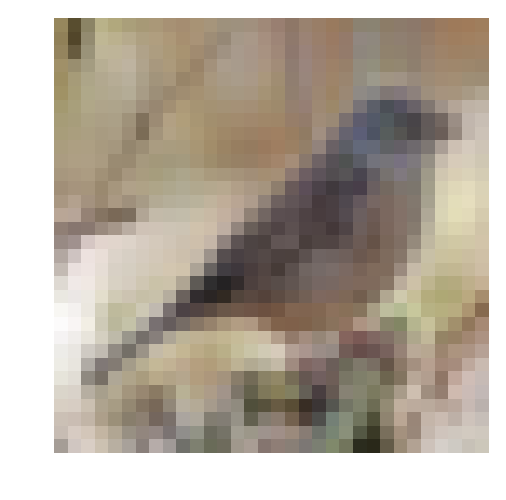

In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper
import numpy as np

# Explore the dataset
batch_id = 2
sample_id = 18
helper.display_stats(cifar10_dataset_folder_path, batch_id, sample_id)

In [68]:
from skimage import color

## Implement Preprocess Functions
### Normalize
In the cell below, implement the `normalize` function to take in image data, `x`, and return it as a normalized Numpy array. The values should be in the range of 0 to 1, inclusive.  The return object should be the same shape as `x`.

In [69]:
# def to_hsi(x):
#     r = x[:,:,:,0]
#     g = x[:,:,:,1]
#     b = x[:,:,:,2]
    
#     theta = np.acos((0.5 * ((r-g) + (r-b))) / (((r-g)**2) + (r-b *)))

def normalize(x):
    """
    Normalize a list of sample image data in the range of 0 to 1
    : x: List of image data.  The image shape is (32, 32, 3)
    : return: Numpy array of normalize data
    """
    x = x / 255.0
    for i in range(x.shape[0]):
        x[i,:,:,:] = color.rgb2hsv(x[i,:,:,:])
    return x


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_normalize(normalize)

Tests Passed


### One-hot encode
Just like the previous code cell, you'll be implementing a function for preprocessing.  This time, you'll implement the `one_hot_encode` function. The input, `x`, are a list of labels.  Implement the function to return the list of labels as One-Hot encoded Numpy array.  The possible values for labels are 0 to 9. The one-hot encoding function should return the same encoding for each value between each call to `one_hot_encode`.  Make sure to save the map of encodings outside the function.

Hint: Don't reinvent the wheel.

In [5]:
def one_hot_encode(x):
    """
    One hot encode a list of sample labels. Return a one-hot encoded vector for each label.
    : x: List of sample Labels
    : return: Numpy array of one-hot encoded labels
    """
    m = (x.shape[0] if hasattr(x, 'shape') else len(x))
    rv = np.zeros((m, 10))
    rv[range(m),x] = 1
    return rv

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_one_hot_encode(one_hot_encode)

Tests Passed


### Randomize Data
As you saw from exploring the data above, the order of the samples are randomized.  It doesn't hurt to randomize it again, but you don't need to for this dataset.

## Preprocess all the data and save it
Running the code cell below will preprocess all the CIFAR-10 data and save it to file. The code below also uses 10% of the training data for validation.

In [70]:
%%time
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
# Preprocess Training, Validation, and Testing Data
helper.preprocess_and_save_data(cifar10_dataset_folder_path, normalize, one_hot_encode)

CPU times: user 16.3 s, sys: 3.35 s, total: 19.7 s
Wall time: 30.1 s


# Check Point
This is your first checkpoint.  If you ever decide to come back to this notebook or have to restart the notebook, you can start from here.  The preprocessed data has been saved to disk.

In [1]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import pickle
import problem_unittests as tests
import helper

# Load the Preprocessed Validation data
valid_features, valid_labels = pickle.load(open('preprocess_validation.p', mode='rb'))

## Build the network
For the neural network, you'll build each layer into a function.  Most of the code you've seen has been outside of functions. To test your code more thoroughly, we require that you put each layer in a function.  This allows us to give you better feedback and test for simple mistakes using our unittests before you submit your project.

>**Note:** If you're finding it hard to dedicate enough time for this course each week, we've provided a small shortcut to this part of the project. In the next couple of problems, you'll have the option to use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages to build each layer, except the layers you build in the "Convolutional and Max Pooling Layer" section.  TF Layers is similar to Keras's and TFLearn's abstraction to layers, so it's easy to pickup.

>However, if you would like to get the most out of this course, try to solve all the problems _without_ using anything from the TF Layers packages. You **can** still use classes from other packages that happen to have the same name as ones you find in TF Layers! For example, instead of using the TF Layers version of the `conv2d` class, [tf.layers.conv2d](https://www.tensorflow.org/api_docs/python/tf/layers/conv2d), you would want to use the TF Neural Network version of `conv2d`, [tf.nn.conv2d](https://www.tensorflow.org/api_docs/python/tf/nn/conv2d). 

Let's begin!

### Input
The neural network needs to read the image data, one-hot encoded labels, and dropout keep probability. Implement the following functions
* Implement `neural_net_image_input`
 * Return a [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder)
 * Set the shape using `image_shape` with batch size set to `None`.
 * Name the TensorFlow placeholder "x" using the TensorFlow `name` parameter in the [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder).
* Implement `neural_net_label_input`
 * Return a [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder)
 * Set the shape using `n_classes` with batch size set to `None`.
 * Name the TensorFlow placeholder "y" using the TensorFlow `name` parameter in the [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder).
* Implement `neural_net_keep_prob_input`
 * Return a [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder) for dropout keep probability.
 * Name the TensorFlow placeholder "keep_prob" using the TensorFlow `name` parameter in the [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder).

These names will be used at the end of the project to load your saved model.

Note: `None` for shapes in TensorFlow allow for a dynamic size.

In [2]:
import tensorflow as tf

def neural_net_image_input(image_shape):
    """
    Return a Tensor for a batch of image input
    : image_shape: Shape of the images
    : return: Tensor for image input.
    """
    tensor_shape = tuple([None] + list(image_shape))
    return tf.placeholder(tf.float32, shape=tensor_shape, name='x')


def neural_net_label_input(n_classes):
    """
    Return a Tensor for a batch of label input
    : n_classes: Number of classes
    : return: Tensor for label input.
    """
    return tf.placeholder(tf.float32, shape=(None,n_classes), name='y')


def neural_net_keep_prob_input():
    """
    Return a Tensor for keep probability
    : return: Tensor for keep probability.
    """
    return tf.placeholder(tf.float32, name='keep_prob')

def neural_net_learn_rate_input():
    """
    Return a Tensor for keep probability
    : return: Tensor for keep probability.
    """
    return tf.placeholder(tf.float32, name='learn_rate')


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tf.reset_default_graph()
tests.test_nn_image_inputs(neural_net_image_input)
tests.test_nn_label_inputs(neural_net_label_input)
tests.test_nn_keep_prob_inputs(neural_net_keep_prob_input)

Image Input Tests Passed.
Label Input Tests Passed.
Keep Prob Tests Passed.


### Convolution and Max Pooling Layer
Convolution layers have a lot of success with images. For this code cell, you should implement the function `conv2d_maxpool` to apply convolution then max pooling:
* Create the weight and bias using `conv_ksize`, `conv_num_outputs` and the shape of `x_tensor`.
* Apply a convolution to `x_tensor` using weight and `conv_strides`.
 * We recommend you use same padding, but you're welcome to use any padding.
* Add bias
* Add a nonlinear activation to the convolution.
* Apply Max Pooling using `pool_ksize` and `pool_strides`.
 * We recommend you use same padding, but you're welcome to use any padding.

**Note:** You **can't** use [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) for **this** layer, but you can still use TensorFlow's [Neural Network](https://www.tensorflow.org/api_docs/python/tf/nn) package. You may still use the shortcut option for all the **other** layers.

In [3]:
def conv2d_maxpool(x_tensor, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides):
    """
    Apply convolution then max pooling to x_tensor
    :param x_tensor: TensorFlow Tensor
    :param conv_num_outputs: Number of outputs for the convolutional layer
    :param conv_ksize: kernal size 2-D Tuple for the convolutional layer
    :param conv_strides: Stride 2-D Tuple for convolution
    :param pool_ksize: kernal size 2-D Tuple for pool
    :param pool_strides: Stride 2-D Tuple for pool
    : return: A tensor that represents convolution and max pooling of x_tensor
    """
    conv_ksize   = list(conv_ksize)
    conv_strides = list(conv_strides)
    pool_ksize   = list(pool_ksize)
    pool_strides = list(pool_strides)
    
    conv_num_inputs = int(x_tensor.shape[3])
    conv_weights = tf.Variable(tf.truncated_normal(
        conv_ksize + [conv_num_inputs,conv_num_outputs], stddev=0.01))
    conv_strides = [1] + conv_strides + [1]
    
    rv = tf.nn.conv2d(x_tensor, conv_weights, conv_strides, 'SAME')
    
    conv_bias = tf.Variable(tf.zeros(rv.shape[1:]))
    rv = tf.nn.relu(rv + conv_bias)
    
    pool_ksize = [1] + pool_ksize + [1]
    pool_strides = [1] + pool_strides + [1]
    rv = tf.nn.max_pool(rv, pool_ksize, pool_strides, 'SAME')
    return rv


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_con_pool(conv2d_maxpool)

Tests Passed


### Flatten Layer
Implement the `flatten` function to change the dimension of `x_tensor` from a 4-D tensor to a 2-D tensor.  The output should be the shape (*Batch Size*, *Flattened Image Size*). Shortcut option: you can use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages for this layer. For more of a challenge, only use other TensorFlow packages.

In [4]:
def flatten(x_tensor):
    """
    Flatten x_tensor to (Batch Size, Flattened Image Size)
    : x_tensor: A tensor of size (Batch Size, ...), where ... are the image dimensions.
    : return: A tensor of size (Batch Size, Flattened Image Size).
    """
    
    return tf.contrib.layers.flatten(x_tensor)


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_flatten(flatten)

Tests Passed


### Fully-Connected Layer
Implement the `fully_conn` function to apply a fully connected layer to `x_tensor` with the shape (*Batch Size*, *num_outputs*). Shortcut option: you can use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages for this layer. For more of a challenge, only use other TensorFlow packages.

In [5]:
def fully_conn(x_tensor, num_outputs):
    """
    Apply a fully connected layer to x_tensor using weight and bias
    : x_tensor: A 2-D tensor where the first dimension is batch size.
    : num_outputs: The number of output that the new tensor should be.
    : return: A 2-D tensor where the second dimension is num_outputs.
    """
    dimensions = [int(x_tensor.shape[1]), num_outputs]
    weights = tf.Variable(tf.truncated_normal(dimensions, stddev=0.01))
    bias = tf.Variable(tf.zeros(num_outputs))
    return tf.nn.relu(tf.matmul(x_tensor, weights) + bias)


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_fully_conn(fully_conn)

Tests Passed


### Output Layer
Implement the `output` function to apply a fully connected layer to `x_tensor` with the shape (*Batch Size*, *num_outputs*). Shortcut option: you can use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages for this layer. For more of a challenge, only use other TensorFlow packages.

**Note:** Activation, softmax, or cross entropy should **not** be applied to this.

In [6]:
def output(x_tensor, num_outputs):
    """
    Apply a output layer to x_tensor using weight and bias
    : x_tensor: A 2-D tensor where the first dimension is batch size.
    : num_outputs: The number of output that the new tensor should be.
    : return: A 2-D tensor where the second dimension is num_outputs.
    """
    # TODO: Implement Function
    dimensions = [int(x_tensor.shape[1]), num_outputs]
    weights = tf.Variable(tf.truncated_normal(dimensions, stddev=0.01))
    bias = tf.Variable(tf.zeros(num_outputs))
    return tf.matmul(x_tensor, weights) + bias


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_output(output)

Tests Passed


### Create Convolutional Model
Implement the function `conv_net` to create a convolutional neural network model. The function takes in a batch of images, `x`, and outputs logits.  Use the layers you created above to create this model:

* Apply 1, 2, or 3 Convolution and Max Pool layers
* Apply a Flatten Layer
* Apply 1, 2, or 3 Fully Connected Layers
* Apply an Output Layer
* Return the output
* Apply [TensorFlow's Dropout](https://www.tensorflow.org/api_docs/python/tf/nn/dropout) to one or more layers in the model using `keep_prob`. 

In [7]:
def conv_net(x, keep_prob):
    """
    Create a convolutional neural network model
    : x: Placeholder tensor that holds image data.
    : keep_prob: Placeholder tensor that hold dropout keep probability.
    : return: Tensor that represents logits
    """
    # TODO: Apply 1, 2, or 3 Convolution and Max Pool layers
    #    Play around with different number of outputs, kernel size and stride
    # Function Definition from Above:
    #    conv2d_maxpool(x_tensor, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides)
    #with tf.device('/gpu:0'):
    x_tensor = x
    x_tensor = conv2d_maxpool(x_tensor, 128, [8,8], [1,1], [2,2], [1,1])

    x_tensor = conv2d_maxpool(x_tensor, 128, [4,4], [2,2], [2,2], [2,2])
    x_tensor = tf.nn.dropout(x_tensor, keep_prob)
    #with tf.device('/gpu:1'):
    x_tensor = conv2d_maxpool(x_tensor,  64, [4,4], [1,1], [2,2], [2,2])

    # TODO: Apply a Flatten Layer
    # Function Definition from Above:
    #   flatten(x_tensor)
    x_tensor = flatten(x_tensor)

    # TODO: Apply 1, 2, or 3 Fully Connected Layers
    #    Play around with different number of outputs
    # Function Definition from Above:
    #   fully_conn(x_tensor, num_outputs)
    x_tensor = tf.nn.dropout(fully_conn(x_tensor, 512), keep_prob)
    x_tensor = fully_conn(x_tensor, 256)
    x_tensor = tf.nn.dropout(fully_conn(x_tensor, 256), keep_prob)

    # TODO: Apply an Output Layer
    #    Set this to the number of classes
    # Function Definition from Above:
    #   output(x_tensor, num_outputs)
    x_tensor = output(x_tensor, 10)

# TODO: return output
    return x_tensor


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""

##############################
## Build the Neural Network ##
##############################

# Remove previous weights, bias, inputs, etc..
tf.reset_default_graph()

# Inputs
# x = (neural_net_image_input((32, 32, 3)), neural_net_image_input((32, 32, 3)))
x = neural_net_image_input((32, 32, 3))
y = neural_net_label_input(10)
keep_prob = neural_net_keep_prob_input()
learn_rate = neural_net_learn_rate_input()

# Model
logits = []
with tf.variable_scope(tf.get_variable_scope()):
        logits.append(conv_net(x, keep_prob))

logits = tf.concat(logits, 0)
# Name logits Tensor, so that is can be loaded from disk after training
logits = tf.identity(logits, name='logits')

# Loss and Optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate=learn_rate).minimize(cost)

# Accuracy
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32), name='accuracy')

tests.test_conv_net(conv_net)

Neural Network Built!


## Train the Neural Network
### Single Optimization
Implement the function `train_neural_network` to do a single optimization.  The optimization should use `optimizer` to optimize in `session` with a `feed_dict` of the following:
* `x` for image input
* `y` for labels
* `keep_prob` for keep probability for dropout

This function will be called for each batch, so `tf.global_variables_initializer()` has already been called.

Note: Nothing needs to be returned. This function is only optimizing the neural network.

In [8]:
# def split(t,n=2):
#     if n == 1: return (t,)
#     dimSize = int(t.shape[0])
#     partSize = dimSize/n
#     maxIdx = int(partSize)
#     rv = [t[:maxIdx,...]]
#     for i in range(n-2):
#         myMin = int(maxIdx)
#         nextMax = min(dimSize,float(maxIdx)+partSize)
#         myMax = int(nextMax)
        
#         rv.append(t[myMin:myMax,...])
#         maxIdx = nextMax

#     rv.append(t[int(maxIdx):,...])
#     return tuple(rv)

x = np.zeros((100,2,1,5))

xs = split(x,6)
print([x.shape for x in xs])

In [9]:
def train_neural_network(session, optimizer, keep_probability,
                         feature_batch, label_batch, epoch=0):
    """
    Optimize the session on a batch of images and labels
    : session: Current TensorFlow session
    : optimizer: TensorFlow optimizer function
    : keep_probability: keep probability
    : feature_batch: Batch of Numpy image data
    : label_batch: Batch of Numpy label data
    """
    if epoch < 125:
        learning_rate=0.001
    elif epoch < 175:
        learning_rate=0.0003
    elif epoch < 225:
        learning_rate=0.0001
    else:
        learning_rate=0.00003
    session.run(optimizer, feed_dict={x: feature_batch, y: label_batch,
                                      learn_rate: learning_rate,
                                      keep_prob: keep_probability})


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_train_nn(train_neural_network)

Tests Passed


### Show Stats
Implement the function `print_stats` to print loss and validation accuracy.  Use the global variables `valid_features` and `valid_labels` to calculate validation accuracy.  Use a keep probability of `1.0` to calculate the loss and validation accuracy.

In [10]:
import datetime

In [11]:
def print_stats(session, feature_batch, label_batch, cost, accuracy):
    """
    Print information about loss and validation accuracy
    : session: Current TensorFlow session
    : feature_batch: Batch of Numpy image data
    : label_batch: Batch of Numpy label data
    : cost: TensorFlow cost function
    : accuracy: TensorFlow accuracy function
    """
    # TODO: Implement Function
    train_cost, train_acc = session.run((cost, accuracy),
                                        feed_dict={x: feature_batch,
                                                   y: label_batch,
                                                   keep_prob: 1.0})
    valid_cost, valid_acc = session.run((cost, accuracy),
                                        feed_dict={x: valid_features,
                                                   y: valid_labels,
                                                   keep_prob: 1.0})
    print("Training   loss: {0:.02}, accuracy: {1:.02}".format(train_cost, train_acc))
    print(datetime.datetime.now(),"Validation loss: {0:.02}, accuracy: {1:.02}".format(valid_cost, valid_acc))
    return valid_acc

### Hyperparameters
Tune the following parameters:
* Set `epochs` to the number of iterations until the network stops learning or start overfitting
* Set `batch_size` to the highest number that your machine has memory for.  Most people set them to common sizes of memory:
 * 64
 * 128
 * 256
 * ...
* Set `keep_probability` to the probability of keeping a node using dropout

In [12]:
# TODO: Tune Parameters
epochs = 250
batch_size = 256
keep_probability = 0.4

### Train on a Single CIFAR-10 Batch
Instead of training the neural network on all the CIFAR-10 batches of data, let's use a single batch. This should save time while you iterate on the model to get a better accuracy.  Once the final validation accuracy is 50% or greater, run the model on all the data in the next section.

### Fully Train the Model
Now that you got a good accuracy with a single CIFAR-10 batch, try it with all five batches.

NameError: name 'val_accuracy' is not defined

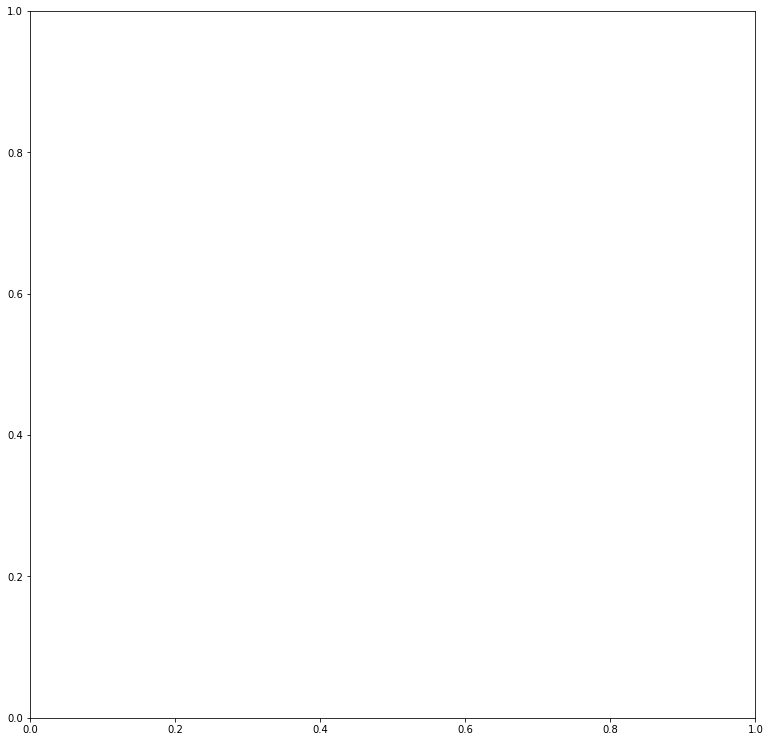

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, axis = plt.subplots(figsize=(13,13))
axis.plot(val_accuracy)

In [14]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
save_model_path = './image_classification'
full_val_accuracy = []

print('Training...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        # Loop over all batches
        n_batches = 5
        for batch_i in range(1, n_batches + 1):
            for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
                train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels, epoch)
            print('Epoch {:>2}, CIFAR-10 Batch {}:  '.format(epoch + 1, batch_i), end='')
            full_val_accuracy.append(print_stats(sess, batch_features, batch_labels, cost, accuracy))
            
    # Save Model
    saver = tf.train.Saver()
    save_path = saver.save(sess, save_model_path)

Training...
Epoch  1, CIFAR-10 Batch 1:  Training   loss: 2.3, accuracy: 0.15
2017-05-17 23:32:53.965677 Validation loss: 2.2, accuracy: 0.17
Epoch  1, CIFAR-10 Batch 2:  Training   loss: 2.1, accuracy: 0.23
2017-05-17 23:32:56.170224 Validation loss: 2.1, accuracy: 0.18
Epoch  1, CIFAR-10 Batch 3:  Training   loss: 1.8, accuracy: 0.28
2017-05-17 23:32:58.404825 Validation loss: 2.0, accuracy: 0.18
Epoch  1, CIFAR-10 Batch 4:  Training   loss: 2.1, accuracy: 0.12
2017-05-17 23:33:00.613129 Validation loss: 2.0, accuracy: 0.19
Epoch  1, CIFAR-10 Batch 5:  Training   loss: 2.0, accuracy: 0.3
2017-05-17 23:33:02.844105 Validation loss: 1.9, accuracy: 0.23
Epoch  2, CIFAR-10 Batch 1:  Training   loss: 2.1, accuracy: 0.23
2017-05-17 23:33:05.046366 Validation loss: 1.8, accuracy: 0.27
Epoch  2, CIFAR-10 Batch 2:  Training   loss: 1.9, accuracy: 0.35
2017-05-17 23:33:07.259769 Validation loss: 1.8, accuracy: 0.28
Epoch  2, CIFAR-10 Batch 3:  Training   loss: 1.6, accuracy: 0.35
2017-05-17 23

Epoch 13, CIFAR-10 Batch 4:  Training   loss: 0.74, accuracy: 0.83
2017-05-17 23:35:13.745896 Validation loss: 1.2, accuracy: 0.58
Epoch 13, CIFAR-10 Batch 5:  Training   loss: 0.79, accuracy: 0.75
2017-05-17 23:35:15.957073 Validation loss: 1.2, accuracy: 0.58
Epoch 14, CIFAR-10 Batch 1:  Training   loss: 0.76, accuracy: 0.75
2017-05-17 23:35:18.163079 Validation loss: 1.1, accuracy: 0.6
Epoch 14, CIFAR-10 Batch 2:  Training   loss: 0.73, accuracy: 0.73
2017-05-17 23:35:20.377490 Validation loss: 1.2, accuracy: 0.58
Epoch 14, CIFAR-10 Batch 3:  Training   loss: 0.6, accuracy: 0.75
2017-05-17 23:35:22.615213 Validation loss: 1.1, accuracy: 0.6
Epoch 14, CIFAR-10 Batch 4:  Training   loss: 0.67, accuracy: 0.8
2017-05-17 23:35:24.830156 Validation loss: 1.1, accuracy: 0.6
Epoch 14, CIFAR-10 Batch 5:  Training   loss: 0.71, accuracy: 0.75
2017-05-17 23:35:27.050952 Validation loss: 1.1, accuracy: 0.59
Epoch 15, CIFAR-10 Batch 1:  Training   loss: 0.7, accuracy: 0.78
2017-05-17 23:35:29.27

Epoch 26, CIFAR-10 Batch 2:  Training   loss: 0.42, accuracy: 0.93
2017-05-17 23:37:35.940001 Validation loss: 1.0, accuracy: 0.64
Epoch 26, CIFAR-10 Batch 3:  Training   loss: 0.34, accuracy: 0.9
2017-05-17 23:37:38.313072 Validation loss: 1.0, accuracy: 0.65
Epoch 26, CIFAR-10 Batch 4:  Training   loss: 0.43, accuracy: 0.93
2017-05-17 23:37:40.629748 Validation loss: 1.0, accuracy: 0.64
Epoch 26, CIFAR-10 Batch 5:  Training   loss: 0.39, accuracy: 0.95
2017-05-17 23:37:42.963261 Validation loss: 1.0, accuracy: 0.64
Epoch 27, CIFAR-10 Batch 1:  Training   loss: 0.5, accuracy: 0.9
2017-05-17 23:37:45.286463 Validation loss: 1.0, accuracy: 0.64
Epoch 27, CIFAR-10 Batch 2:  Training   loss: 0.4, accuracy: 0.83
2017-05-17 23:37:47.609978 Validation loss: 1.0, accuracy: 0.65
Epoch 27, CIFAR-10 Batch 3:  Training   loss: 0.36, accuracy: 0.9
2017-05-17 23:37:49.963095 Validation loss: 1.1, accuracy: 0.63
Epoch 27, CIFAR-10 Batch 4:  Training   loss: 0.38, accuracy: 0.93
2017-05-17 23:37:52.3

Epoch 38, CIFAR-10 Batch 5:  Training   loss: 0.26, accuracy: 0.98
2017-05-17 23:40:04.500371 Validation loss: 0.98, accuracy: 0.66
Epoch 39, CIFAR-10 Batch 1:  Training   loss: 0.27, accuracy: 0.93
2017-05-17 23:40:06.869120 Validation loss: 0.96, accuracy: 0.67
Epoch 39, CIFAR-10 Batch 2:  Training   loss: 0.31, accuracy: 0.88
2017-05-17 23:40:09.273697 Validation loss: 1.0, accuracy: 0.66
Epoch 39, CIFAR-10 Batch 3:  Training   loss: 0.24, accuracy: 1.0
2017-05-17 23:40:11.619422 Validation loss: 0.98, accuracy: 0.66
Epoch 39, CIFAR-10 Batch 4:  Training   loss: 0.26, accuracy: 0.95
2017-05-17 23:40:13.999285 Validation loss: 0.96, accuracy: 0.67
Epoch 39, CIFAR-10 Batch 5:  Training   loss: 0.24, accuracy: 0.98
2017-05-17 23:40:16.388767 Validation loss: 0.98, accuracy: 0.66
Epoch 40, CIFAR-10 Batch 1:  Training   loss: 0.31, accuracy: 0.9
2017-05-17 23:40:18.769586 Validation loss: 0.98, accuracy: 0.66
Epoch 40, CIFAR-10 Batch 2:  Training   loss: 0.28, accuracy: 0.9
2017-05-17 23

Epoch 51, CIFAR-10 Batch 3:  Training   loss: 0.16, accuracy: 1.0
2017-05-17 23:42:34.261755 Validation loss: 0.93, accuracy: 0.67
Epoch 51, CIFAR-10 Batch 4:  Training   loss: 0.18, accuracy: 0.97
2017-05-17 23:42:36.627204 Validation loss: 0.91, accuracy: 0.69
Epoch 51, CIFAR-10 Batch 5:  Training   loss: 0.15, accuracy: 1.0
2017-05-17 23:42:39.036376 Validation loss: 0.96, accuracy: 0.67
Epoch 52, CIFAR-10 Batch 1:  Training   loss: 0.22, accuracy: 0.95
2017-05-17 23:42:41.406792 Validation loss: 0.92, accuracy: 0.69
Epoch 52, CIFAR-10 Batch 2:  Training   loss: 0.25, accuracy: 0.93
2017-05-17 23:42:43.811960 Validation loss: 0.94, accuracy: 0.67
Epoch 52, CIFAR-10 Batch 3:  Training   loss: 0.18, accuracy: 0.97
2017-05-17 23:42:46.166335 Validation loss: 0.97, accuracy: 0.67
Epoch 52, CIFAR-10 Batch 4:  Training   loss: 0.18, accuracy: 1.0
2017-05-17 23:42:48.571346 Validation loss: 0.92, accuracy: 0.68
Epoch 52, CIFAR-10 Batch 5:  Training   loss: 0.15, accuracy: 1.0
2017-05-17 23

Epoch 64, CIFAR-10 Batch 1:  Training   loss: 0.14, accuracy: 1.0
2017-05-17 23:45:04.476419 Validation loss: 0.93, accuracy: 0.69
Epoch 64, CIFAR-10 Batch 2:  Training   loss: 0.18, accuracy: 0.95
2017-05-17 23:45:06.855348 Validation loss: 0.93, accuracy: 0.68
Epoch 64, CIFAR-10 Batch 3:  Training   loss: 0.098, accuracy: 1.0
2017-05-17 23:45:09.253803 Validation loss: 0.93, accuracy: 0.68
Epoch 64, CIFAR-10 Batch 4:  Training   loss: 0.14, accuracy: 1.0
2017-05-17 23:45:11.662616 Validation loss: 0.9, accuracy: 0.7
Epoch 64, CIFAR-10 Batch 5:  Training   loss: 0.088, accuracy: 1.0
2017-05-17 23:45:14.040957 Validation loss: 0.9, accuracy: 0.7
Epoch 65, CIFAR-10 Batch 1:  Training   loss: 0.14, accuracy: 1.0
2017-05-17 23:45:16.415826 Validation loss: 0.91, accuracy: 0.69
Epoch 65, CIFAR-10 Batch 2:  Training   loss: 0.17, accuracy: 0.97
2017-05-17 23:45:18.807261 Validation loss: 0.92, accuracy: 0.69
Epoch 65, CIFAR-10 Batch 3:  Training   loss: 0.12, accuracy: 1.0
2017-05-17 23:45:

Epoch 76, CIFAR-10 Batch 4:  Training   loss: 0.13, accuracy: 1.0
2017-05-17 23:47:34.533343 Validation loss: 0.92, accuracy: 0.7
Epoch 76, CIFAR-10 Batch 5:  Training   loss: 0.083, accuracy: 1.0
2017-05-17 23:47:36.912155 Validation loss: 0.91, accuracy: 0.71
Epoch 77, CIFAR-10 Batch 1:  Training   loss: 0.11, accuracy: 0.97
2017-05-17 23:47:39.270423 Validation loss: 0.92, accuracy: 0.7
Epoch 77, CIFAR-10 Batch 2:  Training   loss: 0.15, accuracy: 0.95
2017-05-17 23:47:41.680501 Validation loss: 0.93, accuracy: 0.7
Epoch 77, CIFAR-10 Batch 3:  Training   loss: 0.073, accuracy: 1.0
2017-05-17 23:47:44.094117 Validation loss: 0.91, accuracy: 0.7
Epoch 77, CIFAR-10 Batch 4:  Training   loss: 0.11, accuracy: 0.97
2017-05-17 23:47:46.502431 Validation loss: 0.9, accuracy: 0.7
Epoch 77, CIFAR-10 Batch 5:  Training   loss: 0.088, accuracy: 1.0
2017-05-17 23:47:48.879192 Validation loss: 0.9, accuracy: 0.7
Epoch 78, CIFAR-10 Batch 1:  Training   loss: 0.11, accuracy: 0.97
2017-05-17 23:47:5

Epoch 89, CIFAR-10 Batch 2:  Training   loss: 0.096, accuracy: 1.0
2017-05-17 23:50:04.000241 Validation loss: 0.93, accuracy: 0.69
Epoch 89, CIFAR-10 Batch 3:  Training   loss: 0.071, accuracy: 1.0
2017-05-17 23:50:06.361025 Validation loss: 0.91, accuracy: 0.7
Epoch 89, CIFAR-10 Batch 4:  Training   loss: 0.062, accuracy: 1.0
2017-05-17 23:50:08.721766 Validation loss: 0.9, accuracy: 0.7
Epoch 89, CIFAR-10 Batch 5:  Training   loss: 0.059, accuracy: 1.0
2017-05-17 23:50:11.099942 Validation loss: 0.91, accuracy: 0.7
Epoch 90, CIFAR-10 Batch 1:  Training   loss: 0.1, accuracy: 1.0
2017-05-17 23:50:13.433232 Validation loss: 0.89, accuracy: 0.7
Epoch 90, CIFAR-10 Batch 2:  Training   loss: 0.11, accuracy: 0.97
2017-05-17 23:50:15.833657 Validation loss: 0.97, accuracy: 0.69
Epoch 90, CIFAR-10 Batch 3:  Training   loss: 0.076, accuracy: 1.0
2017-05-17 23:50:18.252333 Validation loss: 0.9, accuracy: 0.7
Epoch 90, CIFAR-10 Batch 4:  Training   loss: 0.064, accuracy: 1.0
2017-05-17 23:50:2

Epoch 101, CIFAR-10 Batch 5:  Training   loss: 0.055, accuracy: 1.0
2017-05-17 23:52:33.968771 Validation loss: 0.88, accuracy: 0.72
Epoch 102, CIFAR-10 Batch 1:  Training   loss: 0.075, accuracy: 1.0
2017-05-17 23:52:36.332112 Validation loss: 0.9, accuracy: 0.71
Epoch 102, CIFAR-10 Batch 2:  Training   loss: 0.079, accuracy: 1.0
2017-05-17 23:52:38.718600 Validation loss: 0.92, accuracy: 0.7
Epoch 102, CIFAR-10 Batch 3:  Training   loss: 0.063, accuracy: 1.0
2017-05-17 23:52:41.125656 Validation loss: 0.89, accuracy: 0.71
Epoch 102, CIFAR-10 Batch 4:  Training   loss: 0.077, accuracy: 1.0
2017-05-17 23:52:43.465524 Validation loss: 0.88, accuracy: 0.71
Epoch 102, CIFAR-10 Batch 5:  Training   loss: 0.063, accuracy: 1.0
2017-05-17 23:52:45.849290 Validation loss: 0.93, accuracy: 0.7
Epoch 103, CIFAR-10 Batch 1:  Training   loss: 0.086, accuracy: 0.97
2017-05-17 23:52:48.269357 Validation loss: 0.89, accuracy: 0.71
Epoch 103, CIFAR-10 Batch 2:  Training   loss: 0.08, accuracy: 1.0
2017

Epoch 114, CIFAR-10 Batch 2:  Training   loss: 0.077, accuracy: 0.98
2017-05-17 23:55:01.171695 Validation loss: 0.91, accuracy: 0.71
Epoch 114, CIFAR-10 Batch 3:  Training   loss: 0.045, accuracy: 1.0
2017-05-17 23:55:03.526156 Validation loss: 0.87, accuracy: 0.72
Epoch 114, CIFAR-10 Batch 4:  Training   loss: 0.099, accuracy: 1.0
2017-05-17 23:55:05.898082 Validation loss: 0.98, accuracy: 0.7
Epoch 114, CIFAR-10 Batch 5:  Training   loss: 0.038, accuracy: 1.0
2017-05-17 23:55:08.226230 Validation loss: 0.87, accuracy: 0.72
Epoch 115, CIFAR-10 Batch 1:  Training   loss: 0.068, accuracy: 0.97
2017-05-17 23:55:10.590126 Validation loss: 0.91, accuracy: 0.71
Epoch 115, CIFAR-10 Batch 2:  Training   loss: 0.058, accuracy: 1.0
2017-05-17 23:55:12.956454 Validation loss: 0.89, accuracy: 0.71
Epoch 115, CIFAR-10 Batch 3:  Training   loss: 0.04, accuracy: 1.0
2017-05-17 23:55:15.349750 Validation loss: 0.89, accuracy: 0.71
Epoch 115, CIFAR-10 Batch 4:  Training   loss: 0.06, accuracy: 1.0
20

Epoch 126, CIFAR-10 Batch 4:  Training   loss: 0.041, accuracy: 1.0
2017-05-17 23:57:28.594795 Validation loss: 0.89, accuracy: 0.72
Epoch 126, CIFAR-10 Batch 5:  Training   loss: 0.033, accuracy: 1.0
2017-05-17 23:57:30.993403 Validation loss: 0.88, accuracy: 0.72
Epoch 127, CIFAR-10 Batch 1:  Training   loss: 0.042, accuracy: 1.0
2017-05-17 23:57:33.421214 Validation loss: 0.9, accuracy: 0.72
Epoch 127, CIFAR-10 Batch 2:  Training   loss: 0.03, accuracy: 1.0
2017-05-17 23:57:35.837807 Validation loss: 0.88, accuracy: 0.72
Epoch 127, CIFAR-10 Batch 3:  Training   loss: 0.031, accuracy: 1.0
2017-05-17 23:57:38.197269 Validation loss: 0.89, accuracy: 0.72
Epoch 127, CIFAR-10 Batch 4:  Training   loss: 0.032, accuracy: 1.0
2017-05-17 23:57:40.555543 Validation loss: 0.9, accuracy: 0.72
Epoch 127, CIFAR-10 Batch 5:  Training   loss: 0.024, accuracy: 1.0
2017-05-17 23:57:42.922807 Validation loss: 0.89, accuracy: 0.72
Epoch 128, CIFAR-10 Batch 1:  Training   loss: 0.032, accuracy: 1.0
2017

Epoch 139, CIFAR-10 Batch 1:  Training   loss: 0.023, accuracy: 1.0
2017-05-17 23:59:55.829117 Validation loss: 0.91, accuracy: 0.73
Epoch 139, CIFAR-10 Batch 2:  Training   loss: 0.023, accuracy: 1.0
2017-05-17 23:59:58.223270 Validation loss: 0.89, accuracy: 0.73
Epoch 139, CIFAR-10 Batch 3:  Training   loss: 0.015, accuracy: 1.0
2017-05-18 00:00:00.609896 Validation loss: 0.89, accuracy: 0.73
Epoch 139, CIFAR-10 Batch 4:  Training   loss: 0.026, accuracy: 1.0
2017-05-18 00:00:02.965467 Validation loss: 0.94, accuracy: 0.72
Epoch 139, CIFAR-10 Batch 5:  Training   loss: 0.018, accuracy: 1.0
2017-05-18 00:00:05.357000 Validation loss: 0.9, accuracy: 0.73
Epoch 140, CIFAR-10 Batch 1:  Training   loss: 0.026, accuracy: 1.0
2017-05-18 00:00:07.750866 Validation loss: 0.93, accuracy: 0.72
Epoch 140, CIFAR-10 Batch 2:  Training   loss: 0.026, accuracy: 1.0
2017-05-18 00:00:10.098596 Validation loss: 0.9, accuracy: 0.73
Epoch 140, CIFAR-10 Batch 3:  Training   loss: 0.013, accuracy: 1.0
201

Epoch 151, CIFAR-10 Batch 3:  Training   loss: 0.015, accuracy: 1.0
2017-05-18 00:02:22.934606 Validation loss: 0.91, accuracy: 0.72
Epoch 151, CIFAR-10 Batch 4:  Training   loss: 0.019, accuracy: 1.0
2017-05-18 00:02:25.305572 Validation loss: 0.93, accuracy: 0.72
Epoch 151, CIFAR-10 Batch 5:  Training   loss: 0.014, accuracy: 1.0
2017-05-18 00:02:27.712634 Validation loss: 0.91, accuracy: 0.73
Epoch 152, CIFAR-10 Batch 1:  Training   loss: 0.018, accuracy: 1.0
2017-05-18 00:02:30.088728 Validation loss: 0.93, accuracy: 0.72
Epoch 152, CIFAR-10 Batch 2:  Training   loss: 0.022, accuracy: 1.0
2017-05-18 00:02:32.440328 Validation loss: 0.91, accuracy: 0.72
Epoch 152, CIFAR-10 Batch 3:  Training   loss: 0.015, accuracy: 1.0
2017-05-18 00:02:34.830131 Validation loss: 0.91, accuracy: 0.73
Epoch 152, CIFAR-10 Batch 4:  Training   loss: 0.015, accuracy: 1.0
2017-05-18 00:02:37.162889 Validation loss: 0.91, accuracy: 0.72
Epoch 152, CIFAR-10 Batch 5:  Training   loss: 0.016, accuracy: 1.0
2

Epoch 163, CIFAR-10 Batch 5:  Training   loss: 0.017, accuracy: 1.0
2017-05-18 00:04:50.075793 Validation loss: 0.92, accuracy: 0.73
Epoch 164, CIFAR-10 Batch 1:  Training   loss: 0.016, accuracy: 1.0
2017-05-18 00:04:52.414463 Validation loss: 0.94, accuracy: 0.73
Epoch 164, CIFAR-10 Batch 2:  Training   loss: 0.015, accuracy: 1.0
2017-05-18 00:04:54.809640 Validation loss: 0.92, accuracy: 0.73
Epoch 164, CIFAR-10 Batch 3:  Training   loss: 0.0099, accuracy: 1.0
2017-05-18 00:04:57.192172 Validation loss: 0.92, accuracy: 0.73
Epoch 164, CIFAR-10 Batch 4:  Training   loss: 0.015, accuracy: 1.0
2017-05-18 00:04:59.528557 Validation loss: 0.92, accuracy: 0.73
Epoch 164, CIFAR-10 Batch 5:  Training   loss: 0.012, accuracy: 1.0
2017-05-18 00:05:01.903868 Validation loss: 0.92, accuracy: 0.73
Epoch 165, CIFAR-10 Batch 1:  Training   loss: 0.017, accuracy: 1.0
2017-05-18 00:05:04.264520 Validation loss: 0.92, accuracy: 0.73
Epoch 165, CIFAR-10 Batch 2:  Training   loss: 0.013, accuracy: 1.0


Epoch 176, CIFAR-10 Batch 2:  Training   loss: 0.013, accuracy: 1.0
2017-05-18 00:07:17.295601 Validation loss: 0.93, accuracy: 0.73
Epoch 176, CIFAR-10 Batch 3:  Training   loss: 0.0086, accuracy: 1.0
2017-05-18 00:07:19.685319 Validation loss: 0.93, accuracy: 0.74
Epoch 176, CIFAR-10 Batch 4:  Training   loss: 0.009, accuracy: 1.0
2017-05-18 00:07:22.089586 Validation loss: 0.93, accuracy: 0.73
Epoch 176, CIFAR-10 Batch 5:  Training   loss: 0.0086, accuracy: 1.0
2017-05-18 00:07:24.439729 Validation loss: 0.92, accuracy: 0.74
Epoch 177, CIFAR-10 Batch 1:  Training   loss: 0.013, accuracy: 1.0
2017-05-18 00:07:26.774623 Validation loss: 0.93, accuracy: 0.73
Epoch 177, CIFAR-10 Batch 2:  Training   loss: 0.012, accuracy: 1.0
2017-05-18 00:07:29.137110 Validation loss: 0.92, accuracy: 0.73
Epoch 177, CIFAR-10 Batch 3:  Training   loss: 0.0078, accuracy: 1.0
2017-05-18 00:07:31.478690 Validation loss: 0.93, accuracy: 0.73
Epoch 177, CIFAR-10 Batch 4:  Training   loss: 0.011, accuracy: 1.

Epoch 188, CIFAR-10 Batch 4:  Training   loss: 0.0082, accuracy: 1.0
2017-05-18 00:09:42.572018 Validation loss: 0.93, accuracy: 0.73
Epoch 188, CIFAR-10 Batch 5:  Training   loss: 0.0092, accuracy: 1.0
2017-05-18 00:09:44.938245 Validation loss: 0.93, accuracy: 0.73
Epoch 189, CIFAR-10 Batch 1:  Training   loss: 0.012, accuracy: 1.0
2017-05-18 00:09:47.333670 Validation loss: 0.94, accuracy: 0.73
Epoch 189, CIFAR-10 Batch 2:  Training   loss: 0.012, accuracy: 1.0
2017-05-18 00:09:49.709047 Validation loss: 0.94, accuracy: 0.73
Epoch 189, CIFAR-10 Batch 3:  Training   loss: 0.0068, accuracy: 1.0
2017-05-18 00:09:52.109326 Validation loss: 0.94, accuracy: 0.73
Epoch 189, CIFAR-10 Batch 4:  Training   loss: 0.0088, accuracy: 1.0
2017-05-18 00:09:54.510736 Validation loss: 0.94, accuracy: 0.73
Epoch 189, CIFAR-10 Batch 5:  Training   loss: 0.0075, accuracy: 1.0
2017-05-18 00:09:56.889340 Validation loss: 0.93, accuracy: 0.73
Epoch 190, CIFAR-10 Batch 1:  Training   loss: 0.012, accuracy: 

Epoch 201, CIFAR-10 Batch 1:  Training   loss: 0.011, accuracy: 1.0
2017-05-18 00:12:11.035566 Validation loss: 0.96, accuracy: 0.73
Epoch 201, CIFAR-10 Batch 2:  Training   loss: 0.01, accuracy: 1.0
2017-05-18 00:12:13.460360 Validation loss: 0.94, accuracy: 0.73
Epoch 201, CIFAR-10 Batch 3:  Training   loss: 0.0067, accuracy: 1.0
2017-05-18 00:12:15.871623 Validation loss: 0.94, accuracy: 0.74
Epoch 201, CIFAR-10 Batch 4:  Training   loss: 0.0088, accuracy: 1.0
2017-05-18 00:12:18.325914 Validation loss: 0.94, accuracy: 0.73
Epoch 201, CIFAR-10 Batch 5:  Training   loss: 0.0085, accuracy: 1.0
2017-05-18 00:12:20.755592 Validation loss: 0.94, accuracy: 0.73
Epoch 202, CIFAR-10 Batch 1:  Training   loss: 0.01, accuracy: 1.0
2017-05-18 00:12:23.171904 Validation loss: 0.94, accuracy: 0.73
Epoch 202, CIFAR-10 Batch 2:  Training   loss: 0.01, accuracy: 1.0
2017-05-18 00:12:25.592775 Validation loss: 0.94, accuracy: 0.73
Epoch 202, CIFAR-10 Batch 3:  Training   loss: 0.0063, accuracy: 1.0


Epoch 213, CIFAR-10 Batch 3:  Training   loss: 0.0068, accuracy: 1.0
2017-05-18 00:14:40.169213 Validation loss: 0.95, accuracy: 0.73
Epoch 213, CIFAR-10 Batch 4:  Training   loss: 0.0077, accuracy: 1.0
2017-05-18 00:14:42.585957 Validation loss: 0.93, accuracy: 0.74
Epoch 213, CIFAR-10 Batch 5:  Training   loss: 0.0065, accuracy: 1.0
2017-05-18 00:14:45.000832 Validation loss: 0.94, accuracy: 0.74
Epoch 214, CIFAR-10 Batch 1:  Training   loss: 0.01, accuracy: 1.0
2017-05-18 00:14:47.398890 Validation loss: 0.95, accuracy: 0.73
Epoch 214, CIFAR-10 Batch 2:  Training   loss: 0.0095, accuracy: 1.0
2017-05-18 00:14:49.816658 Validation loss: 0.94, accuracy: 0.73
Epoch 214, CIFAR-10 Batch 3:  Training   loss: 0.0063, accuracy: 1.0
2017-05-18 00:14:52.189056 Validation loss: 0.94, accuracy: 0.73
Epoch 214, CIFAR-10 Batch 4:  Training   loss: 0.0076, accuracy: 1.0
2017-05-18 00:14:54.588774 Validation loss: 0.93, accuracy: 0.74
Epoch 214, CIFAR-10 Batch 5:  Training   loss: 0.0068, accuracy:

Epoch 225, CIFAR-10 Batch 5:  Training   loss: 0.0079, accuracy: 1.0
2017-05-18 00:17:09.325960 Validation loss: 0.94, accuracy: 0.73
Epoch 226, CIFAR-10 Batch 1:  Training   loss: 0.01, accuracy: 1.0
2017-05-18 00:17:11.722448 Validation loss: 0.94, accuracy: 0.73
Epoch 226, CIFAR-10 Batch 2:  Training   loss: 0.01, accuracy: 1.0
2017-05-18 00:17:14.119110 Validation loss: 0.94, accuracy: 0.73
Epoch 226, CIFAR-10 Batch 3:  Training   loss: 0.0061, accuracy: 1.0
2017-05-18 00:17:16.505485 Validation loss: 0.94, accuracy: 0.74
Epoch 226, CIFAR-10 Batch 4:  Training   loss: 0.0063, accuracy: 1.0
2017-05-18 00:17:18.912550 Validation loss: 0.94, accuracy: 0.74
Epoch 226, CIFAR-10 Batch 5:  Training   loss: 0.0064, accuracy: 1.0
2017-05-18 00:17:21.320894 Validation loss: 0.94, accuracy: 0.74
Epoch 227, CIFAR-10 Batch 1:  Training   loss: 0.0096, accuracy: 1.0
2017-05-18 00:17:23.735497 Validation loss: 0.94, accuracy: 0.74
Epoch 227, CIFAR-10 Batch 2:  Training   loss: 0.0099, accuracy: 1

Epoch 238, CIFAR-10 Batch 1:  Training   loss: 0.0084, accuracy: 1.0
2017-05-18 00:19:35.673059 Validation loss: 0.95, accuracy: 0.73
Epoch 238, CIFAR-10 Batch 2:  Training   loss: 0.0085, accuracy: 1.0
2017-05-18 00:19:38.059158 Validation loss: 0.94, accuracy: 0.74
Epoch 238, CIFAR-10 Batch 3:  Training   loss: 0.0056, accuracy: 1.0
2017-05-18 00:19:40.471605 Validation loss: 0.95, accuracy: 0.74
Epoch 238, CIFAR-10 Batch 4:  Training   loss: 0.0056, accuracy: 1.0
2017-05-18 00:19:42.857383 Validation loss: 0.95, accuracy: 0.74
Epoch 238, CIFAR-10 Batch 5:  Training   loss: 0.0067, accuracy: 1.0
2017-05-18 00:19:45.258077 Validation loss: 0.95, accuracy: 0.74
Epoch 239, CIFAR-10 Batch 1:  Training   loss: 0.0082, accuracy: 1.0
2017-05-18 00:19:47.613830 Validation loss: 0.95, accuracy: 0.74
Epoch 239, CIFAR-10 Batch 2:  Training   loss: 0.0086, accuracy: 1.0
2017-05-18 00:19:50.015007 Validation loss: 0.95, accuracy: 0.74
Epoch 239, CIFAR-10 Batch 3:  Training   loss: 0.0056, accurac

Epoch 250, CIFAR-10 Batch 2:  Training   loss: 0.0085, accuracy: 1.0
2017-05-18 00:22:02.101452 Validation loss: 0.95, accuracy: 0.73
Epoch 250, CIFAR-10 Batch 3:  Training   loss: 0.0056, accuracy: 1.0
2017-05-18 00:22:04.508050 Validation loss: 0.95, accuracy: 0.74
Epoch 250, CIFAR-10 Batch 4:  Training   loss: 0.0058, accuracy: 1.0
2017-05-18 00:22:06.905863 Validation loss: 0.95, accuracy: 0.73
Epoch 250, CIFAR-10 Batch 5:  Training   loss: 0.0058, accuracy: 1.0
2017-05-18 00:22:09.322609 Validation loss: 0.95, accuracy: 0.73


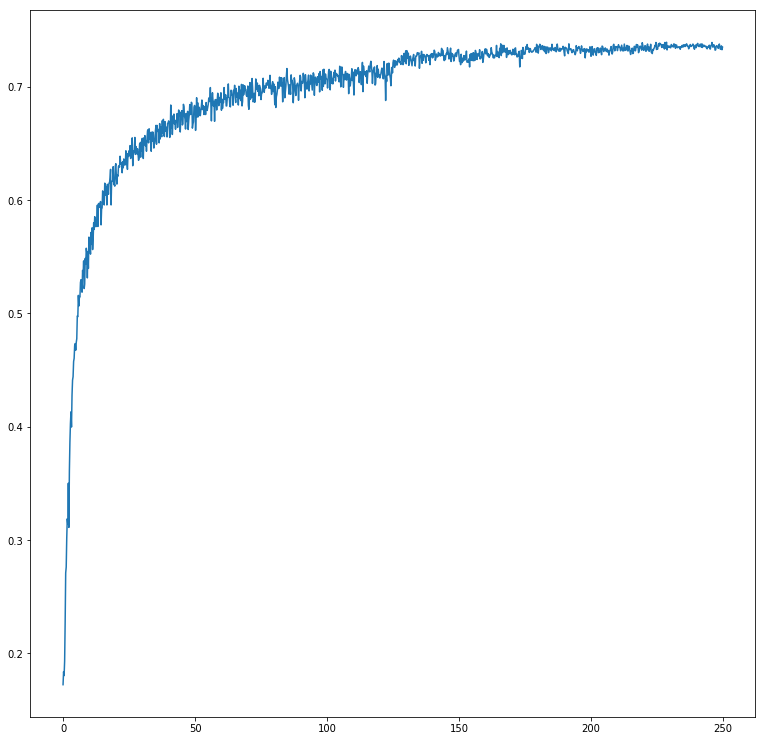

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
fig, axis = plt.subplots(figsize=(13,13))
axis.plot(np.array(range(len(full_val_accuracy)))/5, full_val_accuracy)

# Checkpoint
The model has been saved to disk.
## Test Model
Test your model against the test dataset.  This will be your final accuracy. You should have an accuracy greater than 50%. If you don't, keep tweaking the model architecture and parameters.

Testing Accuracy: 0.728515625



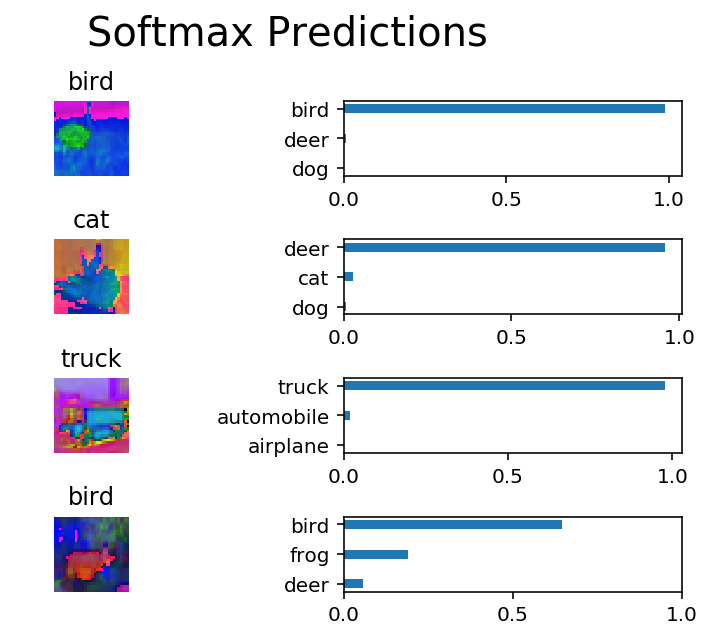

In [17]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import tensorflow as tf
import pickle
import helper
import random

# Set batch size if not already set
try:
    if batch_size:
        pass
except NameError:
    batch_size = 64

save_model_path = './image_classification'
n_samples = 4
top_n_predictions = 3

def test_model():
    """
    Test the saved model against the test dataset
    """

    test_features, test_labels = pickle.load(open('preprocess_test.p', mode='rb'))
    loaded_graph = tf.Graph()

    with tf.Session(graph=loaded_graph) as sess:
        # Load model
        loader = tf.train.import_meta_graph(save_model_path + '.meta')
        loader.restore(sess, save_model_path)
        
#         file_writer = tf.summary.FileWriter('tensorboard', sess.graph)

        # Get Tensors from loaded model
        loaded_x = loaded_graph.get_tensor_by_name('x:0')
        loaded_y = loaded_graph.get_tensor_by_name('y:0')
        loaded_keep_prob = loaded_graph.get_tensor_by_name('keep_prob:0')
        loaded_logits = loaded_graph.get_tensor_by_name('logits:0')
        loaded_acc = loaded_graph.get_tensor_by_name('accuracy:0')
        
        # Get accuracy in batches for memory limitations
        test_batch_acc_total = 0
        test_batch_count = 0
        
        for test_feature_batch, test_label_batch in helper.batch_features_labels(test_features, test_labels, batch_size):
            test_batch_acc_total += sess.run(
                loaded_acc,
                feed_dict={loaded_x: test_feature_batch,
                           loaded_y: test_label_batch,
                           loaded_keep_prob:  1.0})
            test_batch_count += 1

        print('Testing Accuracy: {}\n'.format(test_batch_acc_total/test_batch_count))

        # Print Random Samples
        random_test_features, random_test_labels = tuple(zip(*random.sample(list(zip(test_features, test_labels)), n_samples)))
        random_test_predictions = sess.run(
            tf.nn.top_k(tf.nn.softmax(loaded_logits), top_n_predictions),
            feed_dict={loaded_x: random_test_features, loaded_y: random_test_labels, loaded_keep_prob: 1.0})
        helper.display_image_predictions(random_test_features, random_test_labels, random_test_predictions)


test_model()

## Why 50-80% Accuracy?
You might be wondering why you can't get an accuracy any higher. First things first, 50% isn't bad for a simple CNN.  Pure guessing would get you 10% accuracy. However, you might notice people are getting scores [well above 80%](http://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results.html#43494641522d3130).  That's because we haven't taught you all there is to know about neural networks. We still need to cover a few more techniques.
## Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook.  Save the notebook file as "dlnd_image_classification.ipynb" and save it as a HTML file under "File" -> "Download as".  Include the "helper.py" and "problem_unittests.py" files in your submission.